In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ud_df = pd.read_csv("exports/udpos-langs.csv", usecols=["language_id", "language", "script"]).set_index(["language", "script"])
wiki_df = pd.read_csv("exports/wiki-langs.csv", usecols=["language_id", "language", "size", "script"]).set_index(["language", "script"])

df = ud_df.join(wiki_df, how="outer", lsuffix="_ud", rsuffix="_wiki").reset_index()
df[df.duplicated("language", keep=False)]

,language,script,language_id_ud,language_id_wiki,size
15,Bengali,bengali,NaN,bn,8.4
16,Bengali,latin,NaN,bn,0.5
21,Burmese,myanmar,NaN,my,0.4
22,Burmese,myanmar,NaN,my,1.6
50,Hindi,devanagari,hi,hi,20.2
51,Hindi,latin,NaN,hi,0.5
108,Sanskrit,devanagari,NaN,sa,0.3
109,Sanskrit,latin,sa,NaN,NaN
111,Serbian,cyrillic,NaN,sr,9.1
112,Serbian,latin,sr,NaN,NaN


In [4]:
df

,language,script,language_id_ud,language_id_wiki,size
0,Afrikaans,latin,af,af,1.3
1,Akkadian,latin,akk,NaN,NaN
2,Akuntsu,latin,aqz,NaN,NaN
3,Albanian,latin,sq,sq,5.4
4,Amharic,ethiopic,NaN,am,0.8
...,...,...,...,...,...
143,Western Frisian,latin,NaN,fy,0.2
144,Wolof,latin,wo,NaN,NaN
145,Xhosa,latin,NaN,xh,0.1
146,Yiddish,hebrew,NaN,yi,0.3


,index,language,script,language_id_ud,language_id_wiki,size,source
8,10,Assyrian,syriac,aii,NaN,NaN,UD


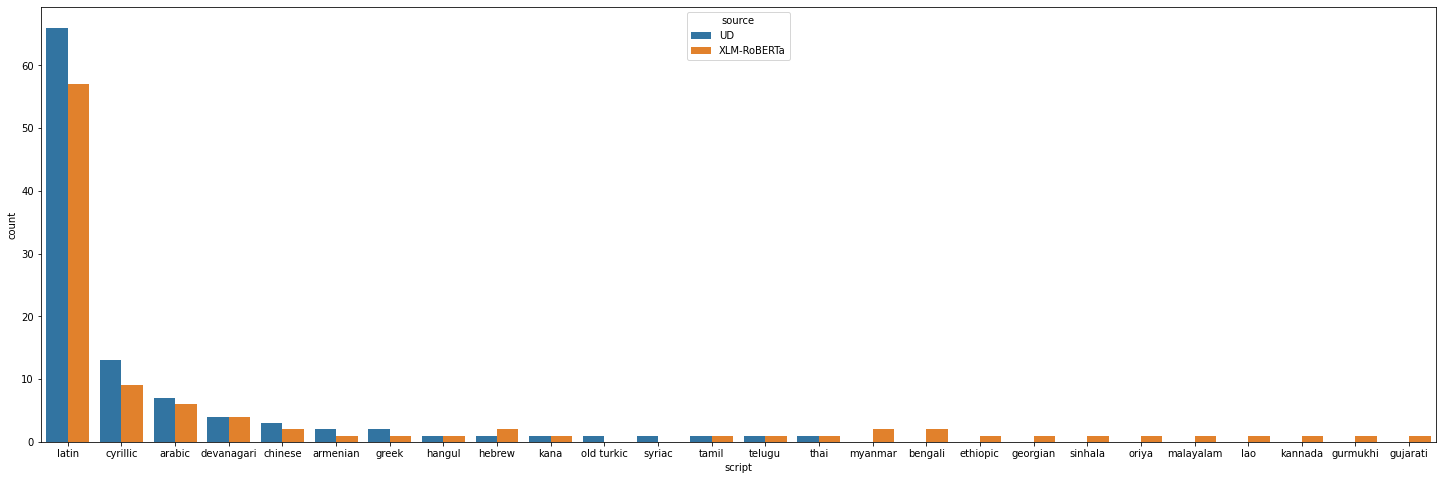

In [9]:
df_ud_ = df.loc[~df.language_id_ud.isna()].copy()
df_ud_["source"] = "UD"
df_wiki_ = df.loc[~df.language_id_wiki.isna()].copy()
df_wiki_["source"] = "XLM-RoBERTa"

df_ = pd.concat([df_ud_.reset_index(), df_wiki_.reset_index()])

plt.figure(figsize=(25,8))
order = df_ud_.reset_index().groupby("script").script.count().sort_values(ascending=False).index.tolist()
for s in df_wiki_.reset_index().groupby("script").script.count().sort_values(ascending=False).index.tolist():
    if s not in order:
        order.append(s)

sns.countplot(x="script", hue="source", data=df_, order=order)
df_[df_.script == "syriac"]

<AxesSubplot:xlabel='script', ylabel='size_q'>

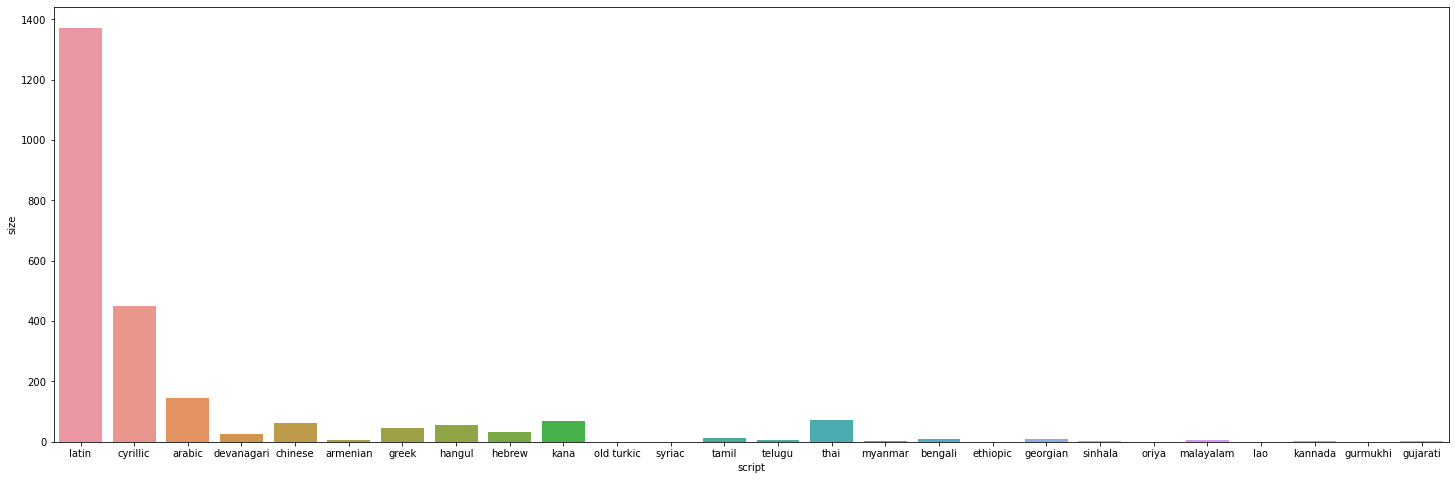

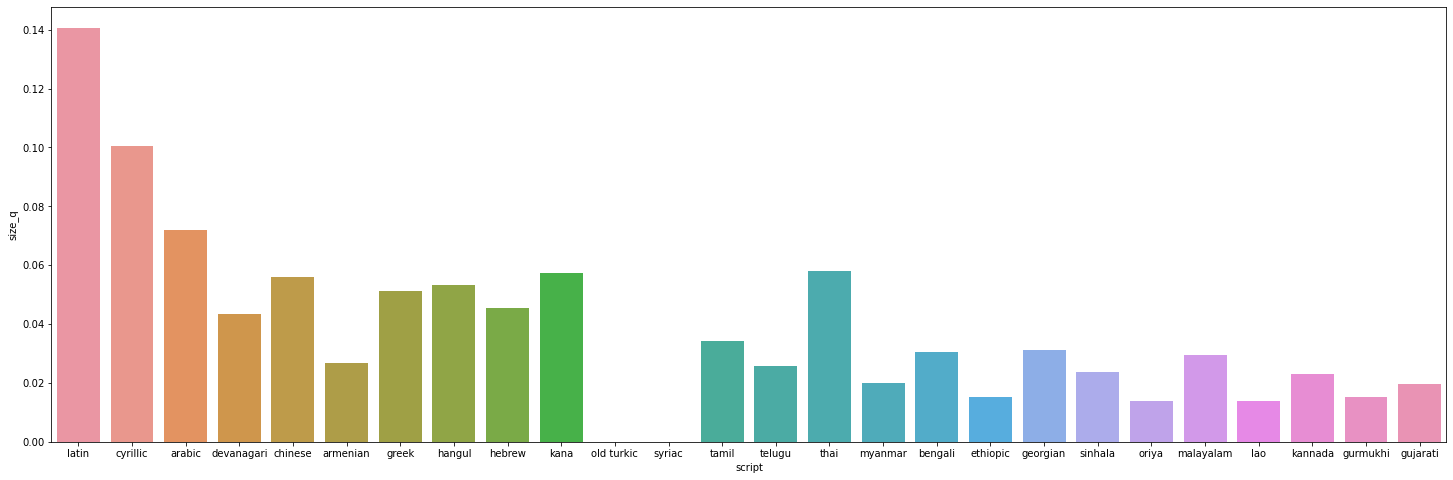

In [ ]:
df_ = df_wiki_.groupby("script")["size"].sum().to_frame().reset_index()
df_["size_p"] = df_["size"].map(lambda x: (x / df_["size"].sum()) ** 0.3)
df_["size_q"] = df_["size_p"].map(lambda x: x / df_["size_p"].sum())

plt.figure(figsize=(25,8))
sns.barplot(x="script", y="size", data=df_, order=order)
plt.figure(figsize=(25,8))
sns.barplot(x="script", y="size_q", data=df_, order=order)